# EO4GEO Summer School Project
## Contents
  
1. Data Exploration  
    1.1 Loading Data & Statistics  
    1.2 Data value distributions  
    1.3 Correlation  
2. Random Forest Regression  
    2.1 RF on full dataset  
        2.1.1 Model Building and Prediction  
        2.1.2 Model Accuracy Assessment  
        2.1.3 Feature Importance  
    2.2 RF only on Sentinel 1 data
        2.2.1 Model Building and Prediction  
        2.2.2 Model Accuracy Assessment  
3. SVM Linear Regression  
    3.1 Building SVM Model and Prediction  
    3.2 SVM accuracy Assessment
4. CNN Prediction
    4.1 Data normalization  
    4.2 Model Building and Training
    4.3 Model Accuracy Assessment

In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import shapely
from shapely.geometry import Point, Polygon
import warnings
import math
import time

# 1. Data Exploration
## 1.1 Load Data aLoading data & statistics

In [2]:
# load data
data = pd.read_csv("bands_sampled2.csv")
# drop columns that contain NaN
data = data.dropna(axis=0)
print("Pandas Dataframe Info:\n")
data.info()
print("\n\nPandas DataFrame Head:\n")
data.head()

Pandas Dataframe Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62 entries, 0 to 63
Columns: 109 entries, season to Sen1_a_12
dtypes: float64(103), int64(2), object(4)
memory usage: 53.3+ KB


Pandas DataFrame Head:



,season,district,site,field_lati,field_long,site_latit,site_longi,block_id,seed_id,seed_rate_,...,Sen1_a_3,Sen1_a_4,Sen1_a_5,Sen1_a_6,Sen1_a_7,Sen1_a_8,Sen1_a_9,Sen1_a_10,Sen1_a_11,Sen1_a_12
0,LR2018,Ndalu,Lungai,0.794619,34.89699,0.779332,34.90301,40256,scduma43,7.14,...,-13.94121,-9.80428,-14.88577,-9.77290,5.16037,1.66067,4.13693,4.13693,5.11287,1.52317
1,LR2018,Ndalu,Lungai,0.794742,34.89950,0.779332,34.90301,40257,scduma43,7.14,...,-13.48856,-9.25225,-13.10161,-8.97811,4.53984,1.49301,4.23631,4.23631,4.12350,1.45928
2,LR2018,Ndalu,Lungai,0.802209,34.89371,0.779332,34.90301,40273,scduma43,4.44,...,-12.15951,-8.63480,-12.86275,-8.31539,5.13694,1.56935,3.52472,3.52472,4.54736,1.54686
3,LR2018,Ndalu,Lungai,0.781985,34.89669,0.779332,34.90301,41997,scduma43,5.33,...,-14.45234,-9.17793,-15.76470,-9.66134,5.47585,1.63527,5.27441,5.27441,6.10337,1.63173
4,LR2018,Ndalu,Lungai,0.790014,34.89853,0.779332,34.90301,42004,scduma43,7.14,...,-14.21484,-7.98126,-14.18121,-9.62644,3.52191,1.40955,6.23357,6.23357,4.55477,1.47315


## 1.2 Data Value Distributions

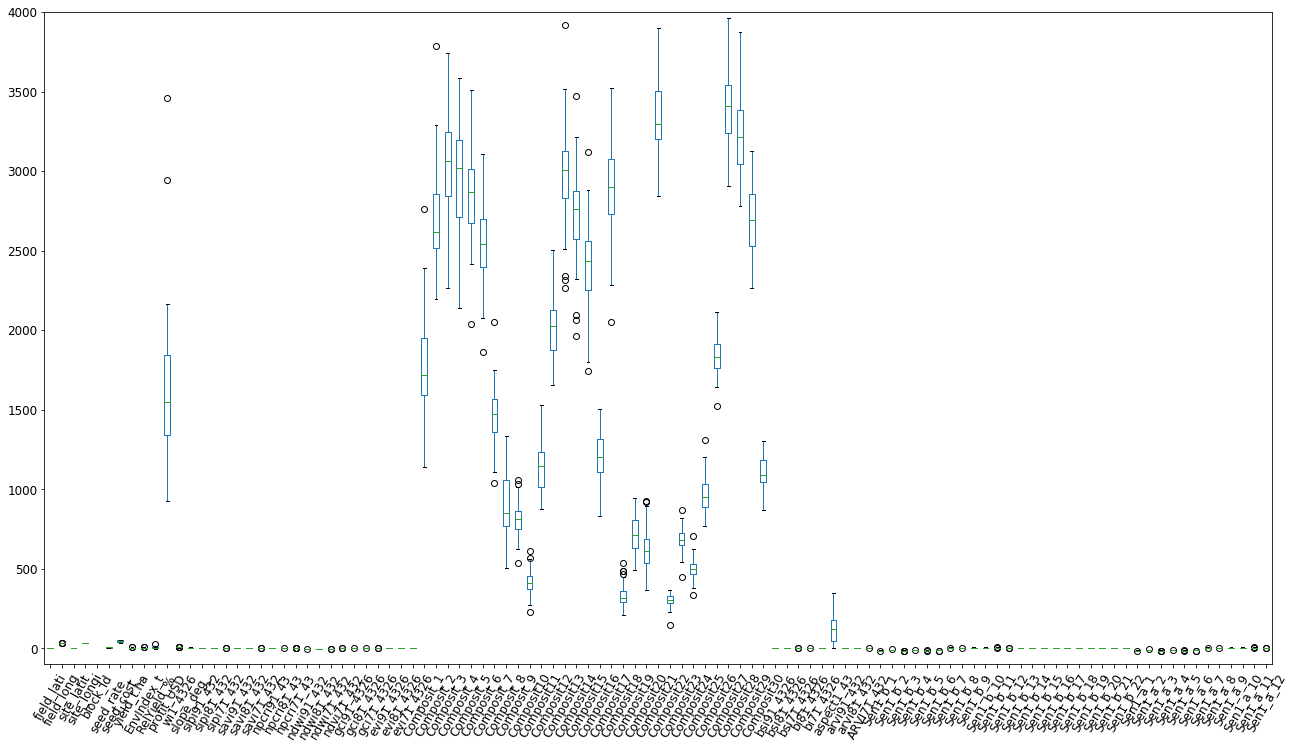

In [3]:
data.plot(kind="box",figsize=(22,12),ylim=((-100,4000)), rot=60,fontsize='large')

## 1.3 Correlation

In [4]:
data.corr(method='pearson')

,field_lati,field_long,site_latit,site_longi,block_id,seed_rate_,seed_cost_,yield_t.ha,EnvIndex_t,RelYield_%,...,Sen1_a_3,Sen1_a_4,Sen1_a_5,Sen1_a_6,Sen1_a_7,Sen1_a_8,Sen1_a_9,Sen1_a_10,Sen1_a_11,Sen1_a_12
field_lati,1.000000e+00,5.068695e-02,-1.644250e-14,NaN,0.063132,1.334425e-01,1.285152e-01,-1.392577e-02,-3.803230e-02,1.115103e-01,...,4.231333e-02,-3.290794e-02,9.159588e-02,1.240108e-01,-9.873860e-02,-9.645274e-02,-7.212150e-02,-7.212150e-02,1.584341e-02,6.122190e-02
field_long,5.068695e-02,1.000000e+00,2.526701e-13,NaN,0.242231,2.018773e-02,2.105971e-02,1.730859e-01,1.347581e-01,1.477409e-01,...,-1.366475e-01,-2.638078e-02,2.410178e-02,9.501294e-02,1.618020e-01,1.190325e-01,1.059550e-01,1.059550e-01,5.743494e-02,1.126066e-01
site_latit,-1.644250e-14,2.526701e-13,1.000000e+00,NaN,0.000000,5.369138e-16,-1.687868e-16,-2.185722e-16,4.894120e-16,-2.482994e-16,...,6.088761e-16,-9.220789e-16,1.100996e-15,-2.412511e-15,-2.161400e-15,-4.347016e-15,-1.280593e-16,-1.280593e-16,-8.990522e-16,-2.585442e-15
site_longi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
block_id,6.313239e-02,2.422312e-01,0.000000e+00,NaN,1.000000,9.989870e-02,1.099449e-01,-1.913479e-02,-4.283756e-02,6.432887e-02,...,-3.735980e-04,-1.427277e-01,-7.406465e-02,-1.185005e-01,-3.698823e-02,5.293570e-03,-1.362419e-01,-1.362419e-01,-2.837240e-02,-7.364537e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Sen1_a_8,-9.645274e-02,1.190325e-01,-4.347016e-15,NaN,0.005294,-2.016259e-01,-2.024676e-01,-3.796741e-02,-3.544105e-02,-1.290957e-02,...,-5.339401e-02,-1.397786e-01,-1.464521e-01,-1.728899e-01,9.453015e-01,1.000000e+00,-8.251138e-02,-8.251138e-02,-3.652420e-03,-5.147309e-02
Sen1_a_9,-7.212150e-02,1.059550e-01,-1.280593e-16,NaN,-0.136242,-8.385694e-03,-9.157498e-03,-3.649560e-02,-2.343534e-02,-8.708085e-02,...,-5.238308e-01,5.193334e-01,-2.845670e-02,-1.449059e-02,-5.178867e-02,-8.251138e-02,1.000000e+00,1.000000e+00,1.560195e-02,1.509115e-02
Sen1_a_10,-7.212150e-02,1.059550e-01,-1.280593e-16,NaN,-0.136242,-8.385694e-03,-9.157498e-03,-3.649560e-02,-2.343534e-02,-8.708085e-02,...,-5.238308e-01,5.193334e-01,-2.845670e-02,-1.449059e-02,-5.178867e-02,-8.251138e-02,1.000000e+00,1.000000e+00,1.560195e-02,1.509115e-02
Sen1_a_11,1.584341e-02,5.743494e-02,-8.990522e-16,NaN,-0.028372,1.356568e-02,1.411894e-02,5.739467e-02,1.022311e-01,-1.379121e-01,...,-8.756633e-04,1.542413e-02,-6.293231e-01,4.465945e-01,8.160513e-03,-3.652420e-03,1.560195e-02,1.560195e-02,1.000000e+00,9.481195e-01


# 2. Random Forest Regression
## 2.1 RF Prediction on full dataset

In [5]:
# defining features
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
features_list = [
"wi1_4326",
"slope_deg_",
"sipi91_432",
"sipi81_432",
"sipi71_432",
"savi91_432",
"savi81_432",
"savi71_432",
"npcri91_43",
"npcri81_43",
"npcri71_43",
"ndwi91_432",
"ndwi81_432",
"ndwi71_432",
"ndvi71_432",
"gci91_4326",
"gci81_4326",
"gci71_4326",
"evi91_4326",
"evi81_4326",
"evi71_4326",
"Composit_1",
"Composit_2",
"Composit_3",
"Composit_4",
"Composit_5",
"Composit_6",
"Composit_7",
"Composit_8",
"Composit_9",
"Composit10",
"Composit11",
"Composit12",
"Composit13",
"Composit14",
"Composit15",
"Composit16",
"Composit17",
"Composit18",
"Composit19",
"Composit20",
"Composit21",
"Composit22",
"Composit23",
"Composit24",
"Composit25",
"Composit26",
"Composit27",
"Composit28",
"Composit29",
"Composit30",
"bsi91_4326",
"bsi81_4326",
"bsi71_4326",
"bi81_4326",
"bi71_4326",
"aspect1_43",
"arvi91_432",
"arvi81_432",
"ARVI71_432",
"Sen1_b_1",
"Sen1_b_2",
"Sen1_b_3",
"Sen1_b_4",
"Sen1_b_5",
"Sen1_b_6",
"Sen1_b_7",
"Sen1_b_8",
"Sen1_b_9",
"Sen1_b_10",
"Sen1_b_11",
"Sen1_b_12",
"Sen1_b_13",
"Sen1_b_14",
"Sen1_b_15",
"Sen1_b_16",
"Sen1_b_17",
"Sen1_b_18",
"Sen1_b_19",
"Sen1_b_20",
"Sen1_b_21",
"Sen1_b_22",
"Sen1_a_1",
"Sen1_a_2",
"Sen1_a_3",
"Sen1_a_4",
"Sen1_a_5",
"Sen1_a_6",
"Sen1_a_7",
"Sen1_a_8",
"Sen1_a_9",
"Sen1_a_10",
"Sen1_a_11",
"Sen1_a_12"]
# define labels and target
features = data[features_list].to_numpy()
labels = data["yield_t.ha"].to_numpy()

## 2.1.1 Building RF Model

In [6]:
# split data to train and test datasets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.15, random_state = 42)

# create RF model
rf = RandomForestRegressor(n_estimators = 1000, random_state = 99, max_depth=100)

# fit model
rf.fit(train_features, train_labels)

# predict values
yield_pred = rf.predict(features)

# add prediction to dataframe, calculate r2
data["yield_pred"] = yield_pred
from sklearn.metrics import r2_score
r2 = r2_score(data["yield_t.ha"],data["yield_pred"])

## 2.1.2 Assess model accuracy

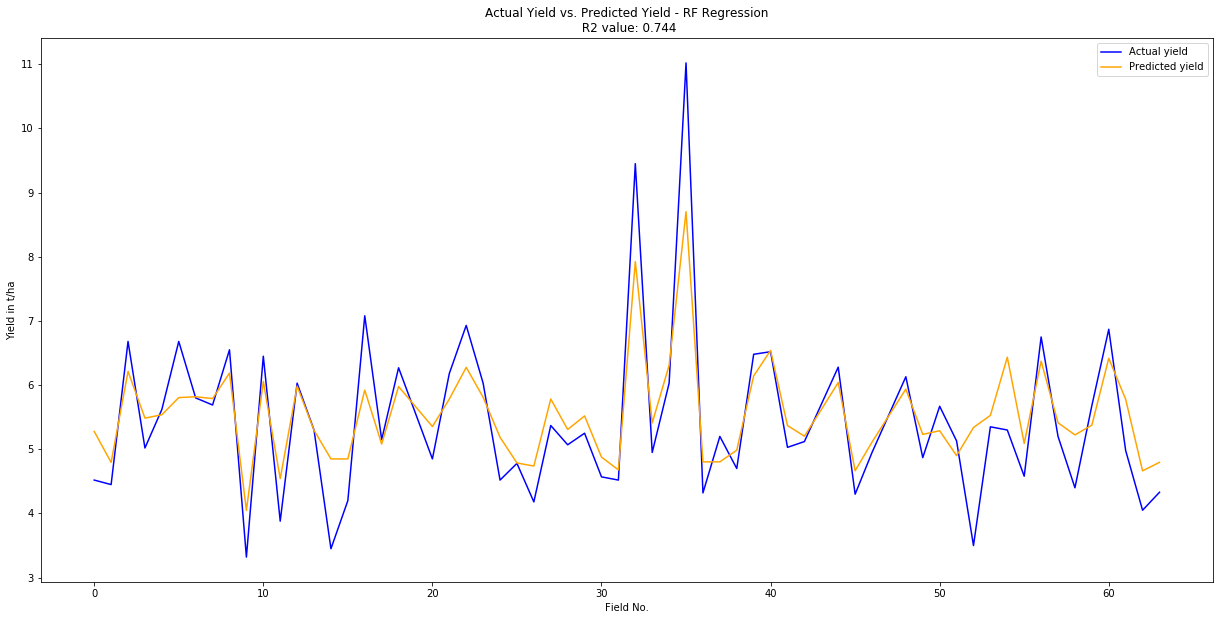

In [7]:
plt.figure(figsize=(21,10))
plt.plot(data["yield_t.ha"],color="blue")
plt.plot(data["yield_pred"],color="orange")
plt.title("Actual Yield vs. Predicted Yield - RF Regression\n R2 value: "+str(round(r2,3)))
plt.ylabel("Yield in t/ha")
plt.xlabel("Field No.")
plt.legend(["Actual yield", "Predicted yield"], loc='upper right')
plt.show()

## 2.1.3 Check feature importances

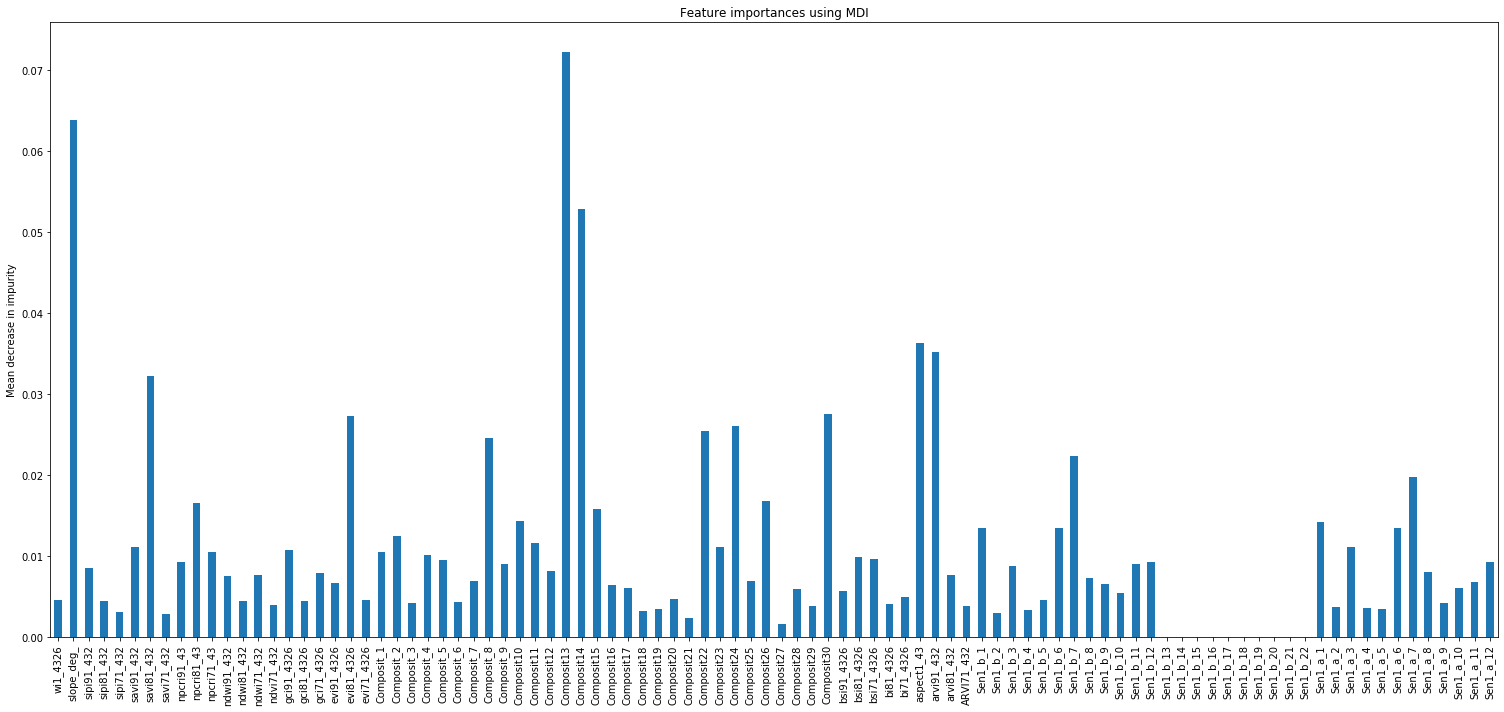

In [8]:
importances = rf.feature_importances_
forest_importances = pd.Series(importances)
x_labels = features_list
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
ax.set_xticklabels(x_labels)
fig.set_size_inches(21, 10)
fig.tight_layout()

## 2.2 Train RF Model only for Sen1 Data
## 2.2.1 Building model

In [9]:
features_sen= [
"Sen1_b_1",
"Sen1_b_2",
"Sen1_b_3",
"Sen1_b_4",
"Sen1_b_5",
"Sen1_b_6",
"Sen1_b_7",
"Sen1_b_8",
"Sen1_b_9",
"Sen1_b_10",
"Sen1_b_11",
"Sen1_b_12",
"Sen1_b_13",
"Sen1_b_14",
"Sen1_b_15",
"Sen1_b_16",
"Sen1_b_17",
"Sen1_b_18",
"Sen1_b_19",
"Sen1_b_20",
"Sen1_b_21",
"Sen1_b_22",
"Sen1_a_1",
"Sen1_a_2",
"Sen1_a_3",
"Sen1_a_4",
"Sen1_a_5",
"Sen1_a_6",
"Sen1_a_7",
"Sen1_a_8",
"Sen1_a_9",
"Sen1_a_10",
"Sen1_a_11",
"Sen1_a_12"
]
features_sen = data[features_sen].to_numpy()
labels_sen = data["yield_t.ha"].to_numpy()

# Build model
# split data to train and test datasets
train_features_sen, test_features_sen, train_labels_sen, test_labels_sen = train_test_split(features_sen, labels_sen, test_size = 0.15, random_state = 42)

# create RF model
rf_sen = RandomForestRegressor(n_estimators = 1000, random_state = 99, max_depth=100)

# fit model
rf_sen.fit(train_features_sen, train_labels_sen)

# predict values
yield_pred_sen = rf_sen.predict(features_sen)

# add prediction to dataframe, calculate r2
data["yield_pred_sen"] = yield_pred_sen
r2_sen = r2_score(data["yield_t.ha"],data["yield_pred_sen"])

## 2.2.2 Assess Sen1 model accuracy

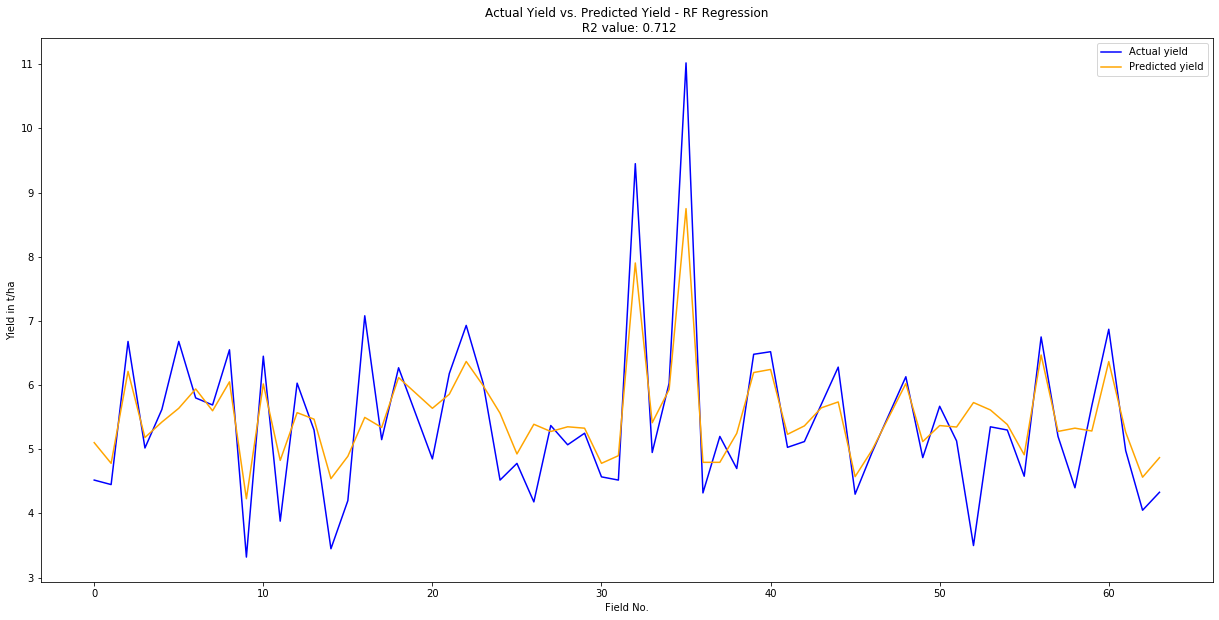

In [10]:
plt.figure(figsize=(21,10))
plt.plot(data["yield_t.ha"],color="blue")
plt.plot(data["yield_pred_sen"],color="orange")
plt.title("Actual Yield vs. Predicted Yield - RF Regression\n R2 value: "+str(round(r2_sen,3)))
plt.ylabel("Yield in t/ha")
plt.xlabel("Field No.")
plt.legend(["Actual yield", "Predicted yield"], loc='upper right')
plt.show()

# 3. SVM Linear Regression Implementation
## 3.1 Building SVM Model & Prediction

In [11]:
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# split dataset again into new variables for SVM
X_train_svm, X_test_svm, y_train_svm, y_test_svm = train_test_split(features, labels, test_size = 0.15)

# define SVM kernel
svr_lin = SVR(kernel='poly', C=1e3,degree=2)

# train model and predict based on data & features at the same time
y_lin = svr_lin.fit(X_train_svm, y_train_svm).predict(np.array(data[features_list]))

# add predicted values to dataframe
data["yield_pred_svm"] = y_lin

# calculate r2 value
r2_svm = r2_score(data["yield_t.ha"],data["yield_pred_svm"])

## 3.2 SVM accuracy assessment

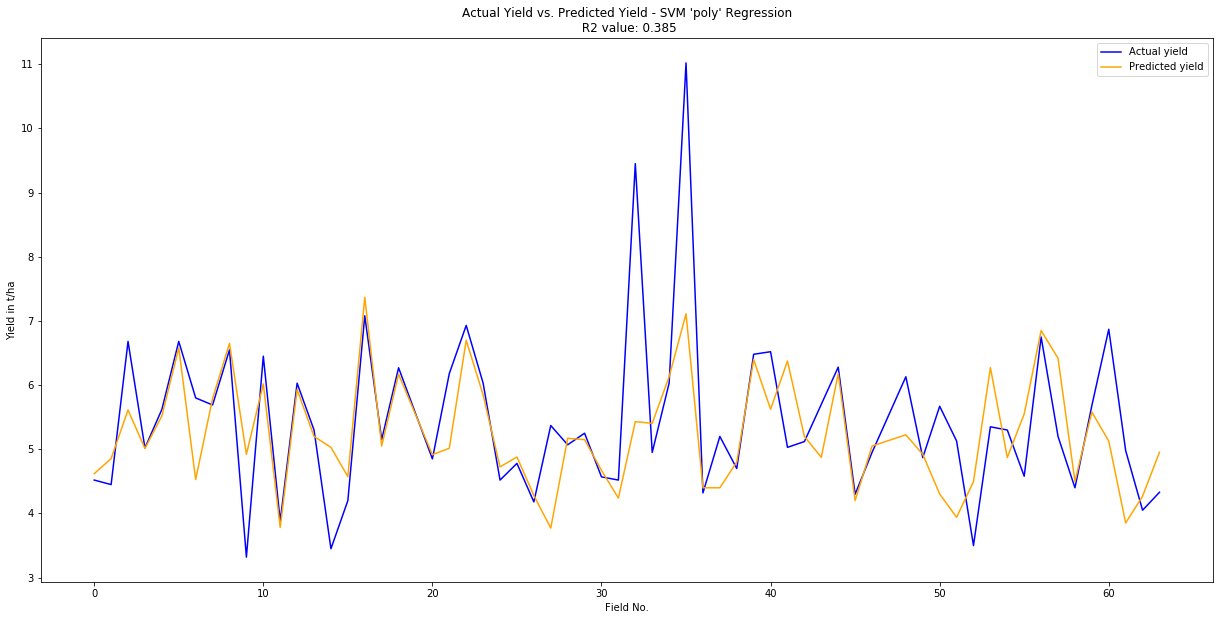

In [12]:
plt.figure(figsize=(21,10))
plt.plot(data["yield_t.ha"],color="blue")
plt.plot(data["yield_pred_svm"],color="orange")
plt.title("Actual Yield vs. Predicted Yield - SVM 'poly' Regression\n R2 value: "+str(round(r2_svm,3)))
plt.ylabel("Yield in t/ha")
plt.xlabel("Field No.")
plt.legend(["Actual yield", "Predicted yield"], loc='upper right')
plt.show()

In [13]:
y_train_svm

array([ 6.03,  3.45,  3.5 ,  4.7 ,  6.45,  5.07,  6.93,  4.52,  5.2 ,
        6.52,  6.48,  5.67,  4.57,  4.2 ,  4.45,  4.95,  6.68,  4.58,
        6.03,  4.85,  5.02,  6.55,  5.3 ,  5.25,  6.13,  5.69,  6.28,
        5.15,  4.95,  4.52,  5.68,  4.78,  5.35,  4.18,  5.12,  4.52,
        5.62,  6.27,  5.2 ,  4.87,  4.3 ,  6.03,  4.4 ,  4.05,  6.75,
        3.88,  3.32, 11.02,  5.7 ,  4.32,  9.45,  6.68])

# 4. CNN prediction
## 4.1 Data Normalization

In [22]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
data_scaled = scaler.fit_transform(data[features_list])
data_cnn = data.copy()
data_cnn = pd.DataFrame(data_cnn,columns=features_list.append("yield_t.ha"))
#data_cnn["yield_t.ha"] = data["yield_t.ha"]
data_cnn["field_lati"] = data["field_lati"]
data_cnn["field_long"] = data["field_long"]

In [23]:
# check data vaules
data_cnn.describe()

,field_lati,field_long,site_latit,site_longi,block_id,seed_rate_,seed_cost_,yield_t.ha,EnvIndex_t,RelYield_%,...,Sen1_a_6,Sen1_a_7,Sen1_a_8,Sen1_a_9,Sen1_a_10,Sen1_a_11,Sen1_a_12,yield_pred,yield_pred_sen,yield_pred_svm
count,62.000000,62.000000,6.200000e+01,62.00000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.784101,34.900188,7.793320e-01,34.90301,57890.500000,6.091452,44.483871,5.439194,5.150040,5.675558,...,-9.381983,5.197119,1.618423,5.093186,5.093186,4.855432,1.533039,5.532953,5.508877,5.246482
std,0.007795,0.005945,1.119286e-15,0.00000,11670.439659,1.032919,7.666709,1.281877,1.168584,6.014290,...,1.130244,1.356439,0.208313,1.037567,1.037567,1.323676,0.191322,0.762154,0.727004,0.859673
min,0.770393,34.878830,7.793320e-01,34.90301,40256.000000,4.440000,32.000000,3.320000,3.280000,-5.670710,...,-12.916580,2.210040,1.235600,2.889060,2.889060,1.319160,1.155500,4.046673,4.229087,3.771714
25%,0.779064,34.896993,7.793320e-01,34.90301,43540.750000,5.330000,39.000000,4.572500,4.398125,1.765248,...,-10.100022,4.547837,1.468690,4.322317,4.322317,3.984727,1.412968,5.009738,5.107394,4.631911
50%,0.782515,34.900110,7.793320e-01,34.90301,58434.000000,6.660000,49.000000,5.200000,4.947500,4.546833,...,-9.376750,5.124170,1.585370,5.159965,5.159965,4.712620,1.491330,5.393028,5.377498,5.050172
75%,0.789849,34.903608,7.793320e-01,34.90301,66372.500000,7.140000,52.000000,6.105000,5.771875,8.809282,...,-8.539658,6.050348,1.744887,5.664168,5.664168,5.609467,1.627383,5.933361,5.827769,5.832844
max,0.804071,34.910820,7.793320e-01,34.90301,81059.000000,7.140000,52.000000,11.020000,9.647500,31.230280,...,-7.104760,8.012840,2.246580,7.157370,7.157370,8.062890,2.104590,8.701973,8.749615,7.368136


## 4.2 Model Building and Training

In [24]:
# import libraries
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
import keras

In [25]:
# define model builder module
def build_model(data_pred,predictors,target,hidden_layer_activation):
    # set predictors
    X = data_pred[predictors]
    # set prediciton goals
    y = data_pred[target]
    # split dataset in training & testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=90)
    
    
    #CNN model definition 
    model = Sequential()
    model.add(keras.Input(shape=(len(predictors),))) # define input shape
    model.add(Dense(1, input_dim=1, activation=hidden_layer_activation, name='input_layer' ))
    model.add(Dense(3, activation=hidden_layer_activation, name='1st_hidden_layer' ))
    model.add(Dense(2, activation=hidden_layer_activation, name='2nd_hidden_layer' ))
    model.add(Dense(1, activation='linear', name='output_layer' ))

    # compile the keras model
    model.compile(loss='mse', optimizer='adam')
    print(model)
    return model,X_train, X_test, y_train, y_test,X,y


# build model via function
predictors = features_list
target = ["yield_t.ha"]
model,X_train, X_test, y_train, y_test,X,y = build_model(data_cnn,predictors,target,"tanh")

print("\n\t\tTraining")
fitting = model.fit(X_train, y_train, epochs=25, batch_size=100, verbose=1, validation_split=0.2)


		Training
Epoch 1/25
1/1 [==============================] - 0s 190ms/step - loss: 17.2458 - val_loss: 23.7937
Epoch 2/25
1/1 [==============================] - 0s 216ms/step - loss: 17.1877 - val_loss: 23.7275
Epoch 3/25
1/1 [==============================] - 0s 60ms/step - loss: 17.1298 - val_loss: 23.6615
Epoch 4/25
1/1 [==============================] - 0s 89ms/step - loss: 17.0721 - val_loss: 23.5957
Epoch 5/25
1/1 [==============================] - 0s 60ms/step - loss: 17.0146 - val_loss: 23.5301
Epoch 6/25
1/1 [==============================] - 0s 114ms/step - loss: 16.9573 - val_loss: 23.4648
Epoch 7/25
1/1 [==============================] - 0s 39ms/step - loss: 16.9002 - val_loss: 23.3996
Epoch 8/25
1/1 [==============================] - 0s 58ms/step - loss: 16.8433 - val_loss: 23.3347
Epoch 9/25
1/1 [==============================] - 0s 53ms/step - loss: 16.7866 - val_loss: 23.2701
Epoch 10/25
1/1 [==============================] - 0s 106ms/step - loss: 16.7302 - val_loss: 2

In [26]:
data_cnn[predictors]

,wi1_4326,slope_deg_,sipi91_432,sipi81_432,sipi71_432,savi91_432,savi81_432,savi71_432,npcri91_43,npcri81_43,...,Sen1_a_4,Sen1_a_5,Sen1_a_6,Sen1_a_7,Sen1_a_8,Sen1_a_9,Sen1_a_10,Sen1_a_11,Sen1_a_12,yield_t.ha
0,7.87305,3.36925,1.35422,1.18508,1.09399,0.30687,0.36206,1.09399,0.37500,0.32658,...,-9.80428,-14.88577,-9.77290,5.16037,1.66067,4.13693,4.13693,5.11287,1.52317,4.52
1,9.04573,1.67011,1.28378,1.20892,1.08292,0.34305,0.34524,1.08292,0.37772,0.34797,...,-9.25225,-13.10161,-8.97811,4.53984,1.49301,4.23631,4.23631,4.12350,1.45928,4.45
2,6.86247,1.85270,1.10700,1.08534,1.05136,0.46508,0.44544,1.05136,0.29862,0.27835,...,-8.63480,-12.86275,-8.31539,5.13694,1.56935,3.52472,3.52472,4.54736,1.54686,6.68
3,6.44330,2.81610,1.56533,1.08492,1.06806,0.21667,0.43791,1.06806,0.48318,0.26650,...,-9.17793,-15.76470,-9.66134,5.47585,1.63527,5.27441,5.27441,6.10337,1.63173,5.02
4,7.31286,2.36123,1.15321,1.12536,1.05493,0.39064,0.41876,1.05493,0.30390,0.29730,...,-7.98126,-14.18121,-9.62644,3.52191,1.40955,6.23357,6.23357,4.55477,1.47315,5.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,7.55562,2.77784,1.24685,1.12749,1.06150,0.34344,0.36008,1.06150,0.35470,0.30721,...,-8.18330,-15.99052,-11.29042,4.03501,1.46663,5.66522,5.66522,4.70011,1.41629,5.68
60,6.21854,3.52422,1.11672,1.07460,1.07125,0.41078,0.43974,1.07125,0.32683,0.28213,...,-9.10081,-15.32525,-10.63238,7.39663,1.83114,4.82471,4.82471,4.69288,1.44138,6.87
61,5.86982,4.98839,1.11111,1.07578,1.07203,0.46512,0.46521,1.07203,0.29412,0.26020,...,-10.52301,-13.79976,-9.07463,5.37263,1.61415,3.60134,3.60134,4.72513,1.52070,4.98
62,7.52530,1.90968,1.20969,1.12230,1.06448,0.37051,0.41371,1.06448,0.41209,0.35687,...,-7.94012,-14.48617,-8.97583,6.05560,1.76034,5.58676,5.58676,5.51034,1.61391,4.05


## 4.3 CNN model assessment

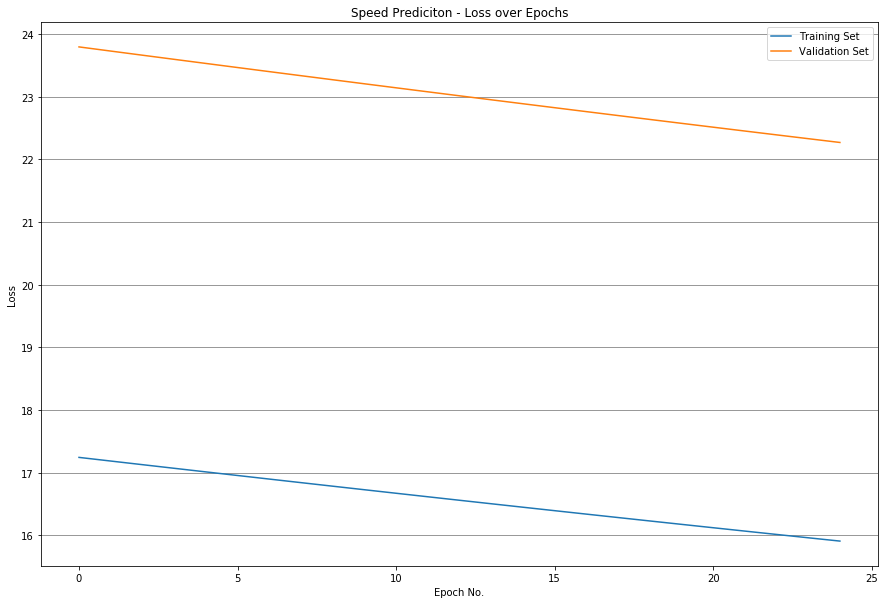

In [27]:
""" Plot Loss Graphs """
# Speed

plt.figure(figsize=(15,10))
plt.plot(fitting.history['loss'])
plt.plot(fitting.history['val_loss'])
plt.title("Speed Prediciton - Loss over Epochs")
plt.ylabel("Loss")
plt.xlabel("Epoch No.")
plt.grid(color="gray",axis="y")
plt.legend(["Training Set", "Validation Set"], loc='upper right')
plt.show()

In [28]:
# perform prediction
yield_pred = model.predict(X)

In [29]:
yield_pred

array([[1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
       [1.2550297],
